In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel as C, RationalQuadratic
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats import norm

## Data

In [ ]:
# Define the input data points as a NumPy array
X = np.array([
    [0.27262382, 0.32449536, 0.89710881, 0.83295115, 0.15406269, 0.79586362],
    [0.54300258, 0.9246939,  0.34156746, 0.64648585, 0.71844033, 0.34313266],
    [0.09083225, 0.66152938, 0.06593091, 0.25857701, 0.96345285, 0.6402654 ],
    [0.11886697, 0.61505494, 0.90581639, 0.8553003,  0.41363143, 0.58523563],
    [0.63021764, 0.8380969,  0.68001305, 0.73189509, 0.52673671, 0.34842921],
    [0.76491917, 0.25588292, 0.60908422, 0.21807904, 0.32294277, 0.09579366],
    [0.05789554, 0.49167222, 0.24742222, 0.21811844, 0.42042833, 0.73096984],
    [0.19525188, 0.07922665, 0.55458046, 0.17056682, 0.01494418, 0.10703171],
    [0.64230298, 0.83687455, 0.02179269, 0.10148801, 0.68307083, 0.6924164 ],
    [0.78994255, 0.19554501, 0.57562333, 0.07365919, 0.25904917, 0.05109986],
    [0.52849733, 0.45742436, 0.36009569, 0.36204551, 0.81689098, 0.63747637],
    [0.72261522, 0.01181284, 0.06364591, 0.16517311, 0.07924415, 0.35995166],
    [0.07566492, 0.33450212, 0.13273274, 0.60831236, 0.91838592, 0.82233079],
    [0.94245084, 0.37743962, 0.48612233, 0.22879108, 0.08263175, 0.71195755],
    [0.14864702, 0.03394336, 0.72880565, 0.31606646, 0.02176938, 0.51691776],
    [0.81711239, 0.54816823, 0.10334758, 0.12436955, 0.72823482, 0.44967361],
    [0.41762629, 0.06409998, 0.24566877, 0.5590408,  0.19153138, 0.25464092],
    [0.72628566, 0.46489581, 0.92457051, 0.8072454,  0.6354384,  0.14341787],
    [0.31981043, 0.52009759, 0.29067775, 0.87670668, 0.49503469, 0.6190825 ],
    [0.87987128, 0.39796199, 0.00363456, 0.95699064, 0.26451373, 0.11486924],
    [0.54124078, 0.63140314, 0.03190205, 0.44998156, 0.79865282, 0.63370429],
    [0.22634792, 0.11502581, 0.82474966, 0.94538372, 0.90531153, 0.95101392],
    [0.68685257, 0.04101721, 0.00757301, 0.285009,   0.69156848, 0.6555429 ],
    [0.17597754, 0.6244165,  0.29554198, 0.46955276, 0.09776977, 0.72814108],
    [0.88164674, 0.20445019, 0.41447436, 0.42038468, 0.26491501, 0.73066019],
    [0.06661051, 0.52804507, 0.8160952,  0.96101714, 0.08650933, 0.77778822],
    [0.93246638, 0.48881189, 0.25860774, 0.95624344, 0.19042781, 0.51985176],
    [0.84686697, 0.14242917, 0.06066859, 0.75629213, 0.5523983,  0.08130609],
    [0.80628208, 0.32412237, 0.72607601, 0.14871213, 0.7193764,  0.36288398],
    [0.47682313, 0.34094195, 0.01433523, 0.88013956, 0.9986547,  0.07966402],
    [0.093963, 0.551228, 0.627628, 0.088379, 0.518696, 0.254927],
    [0.057896, 0.491672, 0.247422, 0.218118, 0.420428, 0.730970],
    [0.154911, 0.404318, 0.925357, 0.504125, 0.329156, 0.659818],
    [0.165371, 0.363779, 0.420619, 0.230009, 0.348883, 0.858776],
    [0.680399, 0.156656, 0.911338, 0.796983, 0.934051, 0.670735],
    [0.426838, 0.064310, 0.917285, 0.932090, 0.945666, 0.051796],
    [0.116356, 0.401660, 0.922931, 0.241754, 0.254578, 0.881394],
    [0.142270, 0.073069, 0.919176, 0.612716, 0.245026, 0.927077],
    [0.344937, 0.229006, 0.910736, 0.500524, 0.630897, 0.856358],
    [0.136817, 0.376995, 0.522750, 0.179062, 0.332099, 0.869202],
    [0.173776, 0.256196, 0.161140, 0.230381, 0.214288, 0.899878],
    [0.102570, 0.347114, 0.407049, 0.404591, 0.342051, 0.939257]
])


# Define the corresponding target values as a NumPy array
y = np.array([
    0.6044327,  0.56275307, 0.00750324, 0.0614243,  0.2730468,  0.08374657,
    1.3649683,  0.09264495, 0.0178696,  0.03356494, 0.0735163,  0.2063097,
    0.00882563, 0.26840032, 0.61152553, 0.01479818, 0.27489251, 0.06676325,
    0.04211835, 0.00270147, 0.01820907, 0.00701603, 0.10050661, 0.47539552,
    0.67514163, 0.51645722, 0.00377748, 0.00313433, 0.02134252, 0.09541116,
    0.3241642072835463, 1.3649700705707237, 0.9849430802809467,
    1.9549781433685212, 0.001197387632578593, 0.004083688357100292,
    1.5719085239401653, 0.5796897540566635, 0.20693197958428017,
    1.8374296799851702, 1.459450577452597, 1.269732024705356
])

## Surrogate model

Removing 2 outliers from evaluation training data
Training initial GPR model for evaluation on scaled training data...
Optimized kernel parameters: 0.838**2 * RBF(length_scale=0.899)
Log marginal likelihood: -20.587035106673934
Test MSE (initial evaluation): 0.06316461630909266
R² Score (initial evaluation): 0.7866889315664952


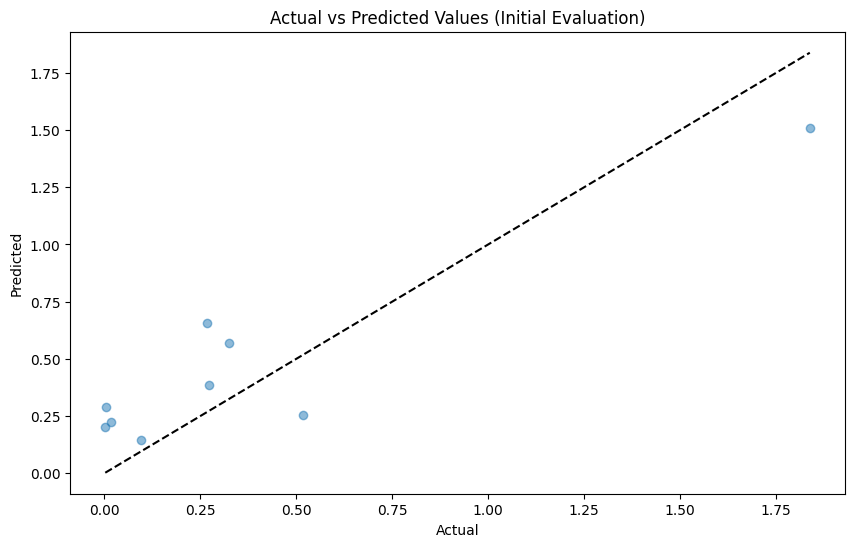

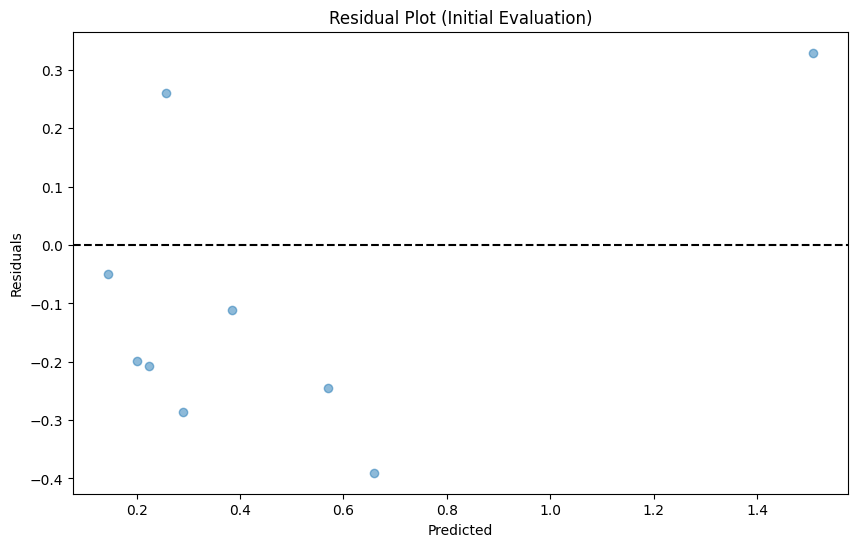

In [ ]:
# Define a more robust custom optimizer with increased max_iter and improved parameters
def custom_optimizer(obj_func, initial_theta, bounds):
    # Increase max iterations and add more parameters to improve convergence
    options = {
        'maxiter': 10000,  # Significantly increased max iterations
        'ftol': 1e-9,      # Function tolerance for convergence
        'gtol': 1e-7,      # Gradient tolerance for convergence
        'maxfun': 15000,   # Maximum number of function evaluations
        'maxls': 50        # Maximum number of line search steps
    }
    res = minimize(obj_func, initial_theta, method='L-BFGS-B', jac=True,
                   bounds=bounds, options=options)
    return res.x, res.fun

# --- Initial GPR setup and performance evaluation ---
# Split the initial data into training and testing sets for *initial evaluation* of the GPR performance.
# This split will NOT be used for the BO loop's training, but for showing the model's accuracy on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for and handle outliers in the *evaluation training* target variable
Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (y_train >= lower_bound) & (y_train <= upper_bound)

print(f"Removing {np.sum(~outlier_mask)} outliers from evaluation training data")
X_train_filtered = X_train[outlier_mask]
y_train_filtered = y_train[outlier_mask]

# --- Ensure data is properly scaled for initial evaluation ---
# Create a robust scaler instance (global variable).
# This 'scaler' instance will be updated throughout the BO process.
global scaler
scaler = RobustScaler()
# Fit scaler only on evaluation training data
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test)  # Transform test data using the fitted scaler

# --- Define a more flexible kernel (global variable) ---
global kernel
kernel = C(1.0, (1e-5, 1e5)) * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5))

# Initialize the GPR model (global variable) with the custom optimizer.
# This 'gpr_model' instance will be updated throughout the BO process.
global gpr_model
gpr_model = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=15,  # Increased number of restarts
    optimizer=custom_optimizer,
    random_state=0,
    normalize_y=True,         # Normalize target values
    alpha=1e-10               # Small regularization to improve numerical stability
)

print("Training initial GPR model for evaluation on scaled training data...")
# Train the GPR model ONLY on the scaled evaluation training data for initial performance metrics
gpr_model.fit(X_train_scaled, y_train_filtered)

# Make predictions for initial evaluation
y_pred = gpr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized kernel parameters: {gpr_model.kernel_}")
print(f"Log marginal likelihood: {gpr_model.log_marginal_likelihood(gpr_model.kernel_.theta)}")
print(f"Test MSE (initial evaluation): {mse}")
print(f"R² Score (initial evaluation): {r2}")

# Visualize predictions vs actual (for initial evaluation)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Initial Evaluation)')
plt.show()

# Plot residuals (for initial evaluation)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot (Initial Evaluation)')
plt.show()

# --- IMPORTANT FOR BO ---
# For Bayesian Optimization, we will use the *entire* accumulated X and y data to train the GPR model.
# The `scaler` and `gpr_model` global instances will be re-fitted on the growing dataset in the BO loop.

## Visualization

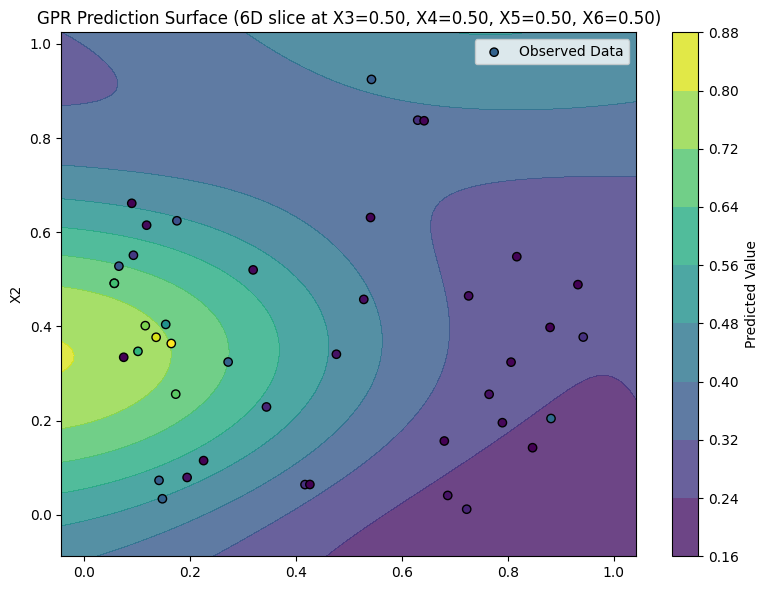

In [ ]:
# Create a meshgrid for plotting (using the first two features of X)
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                           np.linspace(y_min, y_max, 100))

# To make a 2D plot of a 6D model, we need to fix the features.
# A value of 0.5 is chosen as a neutral mid-point in a typically normalized feature space.
x3_fixed_value = 0.5
x4_fixed_value = 0.5
x5_fixed_value = 0.5
x6_fixed_value = 0.5



# Create candidate points for prediction on the meshgrid
# Combine the 2D meshgrid with the fixed features for prediction
x3_fixed_meshgrid = np.full(xx.ravel().shape, x3_fixed_value)
x4_fixed_meshgrid = np.full(xx.ravel().shape, x4_fixed_value)
x5_fixed_meshgrid = np.full(xx.ravel().shape, x5_fixed_value)
x6_fixed_meshgrid = np.full(xx.ravel().shape, x6_fixed_value)
candidate_points_meshgrid = np.c_[xx.ravel(), yy.ravel(), x3_fixed_meshgrid, x4_fixed_meshgrid, x5_fixed_meshgrid, x6_fixed_meshgrid]


# Predict on the meshgrid using the trained GPR model
# We need the gpr_model from the previous cell.
# Ensure the previous cell (training GPR) has been run.
try:
    # Scale the candidate points using the same scaler fitted on the training data
    candidate_points_meshgrid_scaled = scaler.transform(candidate_points_meshgrid)
    Z = gpr_model.predict(candidate_points_meshgrid_scaled)
    Z = Z.reshape(xx.shape)

    # Plot the results
    fig, ax = plt.subplots(1, 1, figsize=(8, 6)) # Create a single plot for GPR 8D visualization

    im = ax.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.8)
    # Scatter plot the original data points using the first two features and color by target value
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, edgecolors='k', label='Observed Data')
    ax.set_title(f'GPR Prediction Surface (6D slice at X3={x3_fixed_value:.2f}, X4={x4_fixed_value:.2f}, X5={x5_fixed_value:.2f}, X6={x6_fixed_value:.2f})')
    ax.set_ylabel('X2')
    fig.colorbar(im, ax=ax, label='Predicted Value')
    ax.legend()

    plt.tight_layout()
    plt.show()

except NameError:
    print("GPR model (gpr_model) not found. Please ensure the previous cell was run to train the model.")
except ValueError as e:
    print(f"An error occurred during prediction: {e}")
    print("This might happen if the GPR model was trained on a different number of features than what's provided for prediction.")
    print("Please ensure that the GPR model (from cell DkzizGWdpSBz) was trained on 6 features, and that 'X' at the time of its training was 6-dimensional.")


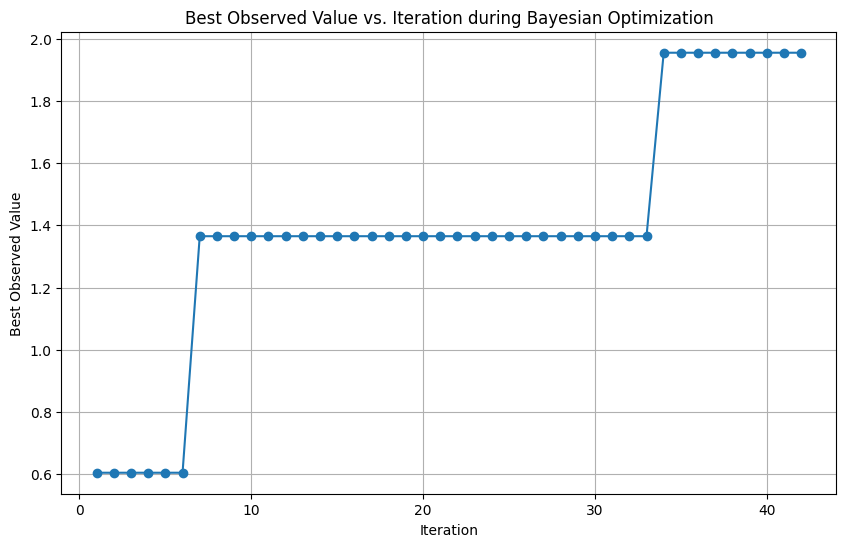

In [ ]:
# Assuming 'y' is the array of all observed values during the optimization
# Calculate the best observed value at each iteration
best_y_per_iteration = np.maximum.accumulate(y)

# Plot the best observed value per iteration
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(best_y_per_iteration) + 1), best_y_per_iteration, marker='o', linestyle='-')
plt.title('Best Observed Value vs. Iteration during Bayesian Optimization')
plt.xlabel('Iteration')
plt.ylabel('Best Observed Value')
plt.grid(True)
plt.show()


## Acquisition function

### Evaluate Candidate Points with UCB/EI/PI


In [ ]:
# Define a custom optimizer with increased max_iter for L-BFGS-B (re-declared for self-containment)
def custom_optimizer(obj_func, initial_theta, bounds):
    options = {
        'maxiter': 10000,
        'ftol': 1e-9,
        'gtol': 1e-7,
        'maxfun': 15000,
        'maxls': 50
    }
    res = minimize(obj_func, initial_theta, method='L-BFGS-B', jac=True,
                   bounds=bounds, options=options)
    return res.x, res.fun

# Define the UCB Acquisition Function
def upper_confidence_bound_gpr(X_new, model, kappa=0.1):
    mean_prediction, std_prediction = model.predict(X_new, return_std=True)
    std_prediction = np.maximum(std_prediction, 1e-9)
    upper_confidence_bound_value = mean_prediction + kappa * std_prediction
    return upper_confidence_bound_value

# Define the EI Acquisition Function
def expected_improvement_gpr(X_new, model, Y_best, xi=0.01):
    mean_prediction, std_prediction = model.predict(X_new, return_std=True)
    std_prediction = np.maximum(std_prediction, 1e-9)
    improvement = mean_prediction - Y_best - xi
    Z = improvement / std_prediction
    ei = improvement * norm.cdf(Z) + std_prediction * norm.pdf(Z)
    return np.maximum(0, ei)

# Define the PI Acquisition Function
def probability_of_improvement_gpr(X_new, model, Y_best, xi=0.01):
    mean_prediction, std_prediction = model.predict(X_new, return_std=True)
    std_prediction = np.maximum(std_prediction, 1e-9)
    improvement = mean_prediction - Y_best - xi
    Z = improvement / std_prediction
    pi = norm.cdf(Z)
    return pi

# --- Setup GPR model for Bayesian Optimization ---
# Ensure the global scaler and gpr_model are used and updated for the start of BO.
# These will be the instances used by the subsequent BO loop.
global scaler, gpr_model, kernel # Ensure access to global instances

scaler = RobustScaler() # Re-instantiate scaler to ensure clean state
X_full_scaled = scaler.fit_transform(X) # Fit scaler on the *entire* current X dataset

kernel = C(1.0, (1e-5, 1e5)) * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5)) # Re-instantiate kernel
gpr_model = GaussianProcessRegressor( # Re-instantiate gpr_model
    kernel=kernel,
    n_restarts_optimizer=15,
    optimizer=custom_optimizer,
    random_state=0,
    normalize_y=True,
    alpha=1e-10
)

print("Training GPR model on all current data for Bayesian Optimization...")
gpr_model.fit(X_full_scaled, y) # Train on the *entire* current X and y
print("Gaussian Process Regressor model trained.")

# --- Generate Candidate Points for evaluating acquisition functions ---
# Define the bounds of the search space based on the observed data
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
x3_min, x3_max = X[:, 2].min(), X[:, 2].max()
x4_min, x4_max = X[:, 3].min(), X[:, 3].max()
x5_min, x5_max = X[:, 4].min(), X[:, 4].max()
x6_min, x6_max = X[:, 5].min(), X[:, 5].max()

# --- Generating Random Points ---
n_random_points = 50000

random_candidate_points = np.random.uniform(low=[x1_min, x2_min, x3_min, x4_min, x5_min, x6_min],
                                            high=[x1_max, x2_max, x3_max, x4_max, x5_max, x6_max],
                                            size=(n_random_points, 6))

# Scale the random candidate points before passing them to the GPR model
random_candidate_points_scaled = scaler.transform(random_candidate_points)

# --- Evaluate Candidate Points with UCB, EI, and PI ---
kappa_ucb = 0.1
random_ucb_values_gpr = upper_confidence_bound_gpr(random_candidate_points_scaled, gpr_model, kappa=kappa_ucb)
max_ucb_index_random_gpr = np.argmax(random_ucb_values_gpr)
next_query_point_ucb = random_candidate_points[max_ucb_index_random_gpr]

current_best_y = np.max(y) # Get the current best observed value from the *entire* y
random_ei_values_gpr = expected_improvement_gpr(random_candidate_points_scaled, gpr_model, current_best_y)
max_ei_index_random_gpr = np.argmax(random_ei_values_gpr)
next_query_point_ei = random_candidate_points[max_ei_index_random_gpr]

xi_pi = 0.01
random_pi_values_gpr = probability_of_improvement_gpr(random_candidate_points_scaled, gpr_model, current_best_y, xi=xi_pi)
max_pi_index_random_gpr = np.argmax(random_pi_values_gpr)
next_query_point_pi = random_candidate_points[max_pi_index_random_gpr]

print("\nRecommended next query points based on each acquisition function:")
print(f"  UCB: {[f'{val:.6f}' for val in next_query_point_ucb]} (UCB value: {random_ucb_values_gpr[max_ucb_index_random_gpr]:.4f})")
print(f"  EI: {[f'{val:.6f}' for val in next_query_point_ei]} (EI value: {random_ei_values_gpr[max_ei_index_random_gpr]:.4f})")
print(f"  PI: {[f'{val:.6f}' for val in next_query_point_pi]} (PI value: {random_pi_values_gpr[max_pi_index_random_gpr]:.4f})")